# Car Price Prediction::

Download dataset from this link:

https://www.kaggle.com/hellbuoy/car-price-prediction

# Problem Statement::

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

# task::
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# WORKFLOW ::

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

4.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

5.Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
6.Train the Model with Epochs (100) and validate it

7.If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .

8.Evaluation Step

9.Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from keras import models
from keras import layers


# Loading Data

In [2]:
cars = pd.read_csv("./datasets/CarPrice_Assignment.csv")

In [3]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# Checking Missing Values

In [5]:
cars.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [6]:
# symboling: -2 (least risky) to +3 most risky
# Most cars are 0,1,2
cars['symboling'].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

# Data Exploration

To perform linear regression, the target variable should be linearly related to independent variables. 
I have commented the graphs to save the time. To have a complete view of data, we need to have pictorial view.

In [7]:
#creating df  with numeric var's only
cars_numeric=cars.select_dtypes(include=['float64','int64'])
cars_numeric.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [8]:
# dropping symboling and car_ID as symboling is more of categorical variable as described before and car_ID is only 
#an index type variable and not a predictor
cars_numeric = cars_numeric.drop(['symboling', 'car_ID'], axis=1)
cars_numeric.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [9]:
# # paiwise scatter plot
# plt.figure(figsize=(20, 10))
# sns.pairplot(cars_numeric)

# #as we can see its difficult to interpret these graphs due to so many of them
# #a BETTER way of checking linearity is in below cell

In [10]:
# #LINEARITY CHECK>>>#to check price has linear relation or not with Indep. var's

# for i, col in enumerate (cars_numeric.columns):
#     plt.figure(i)
#     sns.scatterplot(x=cars_numeric[col],y=cars_numeric['price'])

In [11]:
# corr=cars_numeric.corr()

# plt.figure(figsize=(15,8))
# sns.heatmap(corr,annot=True,cmap="YlGnBu")

# Data Cleaning: Inspecting and aligning Data

In [12]:
cars.info()

#no missing values

#all var's in correct format, however since symboling is a categorical var we need to change its type 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [13]:
# converting symboling to categorical
cars['symboling'] = cars['symboling'].astype('object')
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    object 
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [14]:
#Extracting car names. car name is the first word (before space)
carnames = cars['CarName'].apply(lambda x: x.split(" ")[0])
carnames[:10]

0    alfa-romero
1    alfa-romero
2    alfa-romero
3           audi
4           audi
5           audi
6           audi
7           audi
8           audi
9           audi
Name: CarName, dtype: object

In [15]:
cars['car_company']=carnames
cars['car_company'].value_counts()

#many car names are duplicates like toyota and toyouta, porsche and porcshce etc.
# we need to fix incorrect spelling and get carnames column in order

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
dodge           9
volkswagen      9
bmw             8
buick           8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
chevrolet       3
alfa-romero     3
jaguar          3
vw              2
renault         2
maxda           2
mercury         1
vokswagen       1
Nissan          1
porcshce        1
toyouta         1
Name: car_company, dtype: int64

In [16]:
#volkswagen
cars.loc[(cars['car_company']=="vw")|(cars['car_company']=="vokswagen"),"car_company"]="volkswagen"

#porsche

cars.loc[(cars['car_company']=="porcshce"),"car_company"]="porsche"

#toyota
cars.loc[(cars['car_company']=="toyouta"),"car_company"]="toyota"

# nissan
cars.loc[cars['car_company'] == "Nissan", 'car_company'] = 'nissan'

# mazda
cars.loc[cars['car_company'] == "maxda", 'car_company'] = 'mazda'

cars['car_company'].value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
bmw             8
buick           8
plymouth        7
audi            7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: car_company, dtype: int64

In [17]:
# drop carname variable as we have stored relevant information in 'car_company'
cars = cars.drop('CarName', axis=1)

In [18]:
cars.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17
compressionratio,205.0,10.142537,3.972040,7.00,8.60,9.00,9.40,23.00


In [19]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

# Data Preparation: feature engineering

In [20]:
X=cars.drop(columns=["car_ID"])


In [21]:
# separating categorical data
# cars_categorical = X.select_dtypes(include=['object'])  one way as below

#another way for separating categorical data

cars_categorical = X.loc[:, X.dtypes == 'object']
cars_categorical.head(3)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,car_company
0,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
1,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,alfa-romero


In [22]:
# y

In [23]:
#creating dummy variables
cars_dummies = pd.get_dummies(cars_categorical, drop_first=True)
cars_dummies.head()

,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
0,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
X=X.drop(columns=cars_categorical)

In [25]:
len(cars_dummies.columns)

55

In [26]:
dfX=pd.merge(X,cars_dummies,on=X.index)
dfX.columns

Index(['key_0', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price',
       'symboling_-1', 'symboling_0', 'symboling_1', 'symboling_2',
       'symboling_3', 'fueltype_gas', 'aspiration_turbo', 'doornumber_two',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginelocation_rear', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'car_company_audi',
       'car_company_bmw', 'car_company_buick', 

In [27]:
dfX.drop(columns='key_0',inplace=True)
dfX.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 69 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   wheelbase               205 non-null    float64
 1   carlength               205 non-null    float64
 2   carwidth                205 non-null    float64
 3   carheight               205 non-null    float64
 4   curbweight              205 non-null    int64  
 5   enginesize              205 non-null    int64  
 6   boreratio               205 non-null    float64
 7   stroke                  205 non-null    float64
 8   compressionratio        205 non-null    float64
 9   horsepower              205 non-null    int64  
 10  peakrpm                 205 non-null    int64  
 11  citympg                 205 non-null    int64  
 12  highwaympg              205 non-null    int64  
 13  price                   205 non-null    float64
 14  symboling_-1            205 non-null    ui

In [28]:
dfX.shape

(205, 69)

# Splitting Data

In [29]:
train_d = dfX.sample(frac= 0.7, random_state=11111)
test_d =  dfX.drop(train_d.index)

In [30]:
train_d.shape, test_d.shape

((144, 69), (61, 69))

In [31]:
train_labels = train_d['price']
train_data = train_d.drop('price', axis=1)
test_labels = test_d['price']
test_data = test_d.drop('price', axis=1)

In [32]:
train_data.shape, test_data.shape, train_labels.shape, test_labels.shape

((144, 68), (61, 68), (144,), (61,))

# Data Standardization

In [33]:
mean = train_data.mean(axis=0) # taking the mean of 
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

# max, min normalization, it can be used alternatively

# min = train_data.min(axis=0)
# max = train_data.max(axis=0)

# train_data = (train_data - min)/ (max - min)
# test_data = (test_data - min)/ (max - min)

In [34]:
mean_label = train_labels.mean()
train_labels -= mean_label
std_label = train_labels.std()
train_labels /= std_label
test_labels -= mean_label
test_labels /= std_label

# max, min normalization, it can be used alternatively

# mean_label = train_labels.min(axis=0)
# max = train_labels.max(axis=0)

# std_label = max - mean_label

# train_labels = (train_labels - mean_label)/ std_label
# test_labels = (test_labels - mean_label)/ std_label


In [35]:
train_labels.describe().T

count    1.440000e+02
mean     4.086238e-17
std      1.000000e+00
min     -1.010554e+00
25%     -6.921358e-01
50%     -3.820538e-01
75%      4.566416e-01
max      3.856277e+00
Name: price, dtype: float64

In [36]:
# categorical = train_data.select_dtypes(include=['object'])
# categorical.head(10)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 33 to 153
Data columns (total 68 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   wheelbase               144 non-null    float64
 1   carlength               144 non-null    float64
 2   carwidth                144 non-null    float64
 3   carheight               144 non-null    float64
 4   curbweight              144 non-null    float64
 5   enginesize              144 non-null    float64
 6   boreratio               144 non-null    float64
 7   stroke                  144 non-null    float64
 8   compressionratio        144 non-null    float64
 9   horsepower              144 non-null    float64
 10  peakrpm                 144 non-null    float64
 11  citympg                 144 non-null    float64
 12  highwaympg              144 non-null    float64
 13  symboling_-1            144 non-null    float64
 14  symboling_0             144 non-null    f

In [37]:
train_data.shape, train_labels.shape

((144, 68), (144,))

In [38]:
test_data.shape, test_labels.shape

((61, 68), (61,))

In [39]:
train_data = np.asarray(train_data)
train_labels = np.asarray(train_labels).astype('float64')

test_data = np.asarray(test_data)
test_labels = np.asarray(test_labels).astype('float64')

In [40]:
# we are passing activation function as a parameter here so that we can call this function with tanh or relu while
# fitting and training the model
from keras import models
from keras import layers
def build_model(act):
  model = models.Sequential()
  model.add(layers.Dense(128, activation= act,input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(64, activation= act))
  model.add(layers.Dense(32, activation= act))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

In [41]:
build_model('relu').summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               8832      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 19,201
Trainable params: 19,201
Non-trainable params: 0
_________________________________________________________________


In [42]:
# Regularized model
from keras import regularizers
def build_model_regular(act):
  model = models.Sequential()
  model.add(layers.Dense(32, activation= act,kernel_regularizer= regularizers.l2(l2=0.001),input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(16, activation= act,kernel_regularizer= regularizers.l2(l2=0.001)))
  model.add(layers.Dense(32, activation= act,kernel_regularizer= regularizers.l2(l2=0.001)))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

In [43]:
build_model_regular('tanh').summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                2208      
_________________________________________________________________
dense_5 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_6 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 3,313
Trainable params: 3,313
Non-trainable params: 0
_________________________________________________________________


In [44]:
# dropout model
from keras import regularizers
def build_model_drop(act):
  model = models.Sequential()
  model.add(layers.Dense(10, activation= act,input_shape=(train_data.shape[1],)))
  model.add(layers.Dropout(0.2))
  model.add(layers.Dense(8, activation= act))
  model.add(layers.Dropout(0.2))
  model.add(layers.Dense(6, activation= act))
  model.add(layers.Dropout(0.2))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

In [45]:
build_model_drop('relu').summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 10)                690       
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 8)                 88        
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_10 (Dense)             (None, 6)                 54        
_________________________________________________________________
dropout_2 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                

# K Fold validation section

In [46]:
#k fold validation with relu
# 144/4
import numpy as np
k =  4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores_relu = []
for i in range(k):
  print('processing fold #', i)
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_labels[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate([train_data[:i * num_val_samples],train_data[(i + 1) * num_val_samples:]],  axis=0)
  # print(partial_train_data)
  partial_train_targets = np.concatenate([train_labels[:i * num_val_samples],train_labels[(i + 1) * num_val_samples:]],axis=0)
  model = build_model('relu')
  model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=1, verbose=0)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=1)
  all_scores_relu.append(val_mae)

processing fold # 0
2/2 [==============================] - 0s 0s/step - loss: 0.0354 - mae: 0.1379
processing fold # 1
2/2 [==============================] - 0s 16ms/step - loss: 0.0999 - mae: 0.2206
processing fold # 2
2/2 [==============================] - 0s 0s/step - loss: 0.1624 - mae: 0.2870
processing fold # 3
2/2 [==============================] - 0s 0s/step - loss: 0.3176 - mae: 0.4103


In [47]:
#k fold validation with tanh
# 144/4
import numpy as np
k =  4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores_tanh = []
for i in range(k):
  print('processing fold #', i)
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_labels[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate([train_data[:i * num_val_samples],train_data[(i + 1) * num_val_samples:]],  axis=0)
  # print(partial_train_data)
  partial_train_targets = np.concatenate([train_labels[:i * num_val_samples],train_labels[(i + 1) * num_val_samples:]],axis=0)
  model = build_model('tanh')
  model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=1, verbose=0)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=1)
  all_scores_tanh.append(val_mae)

processing fold # 0
2/2 [==============================] - 0s 14ms/step - loss: 0.0678 - mae: 0.1871
processing fold # 1
2/2 [==============================] - 0s 16ms/step - loss: 0.1281 - mae: 0.2652
processing fold # 2
2/2 [==============================] - 0s 5ms/step - loss: 0.0919 - mae: 0.2184
processing fold # 3
2/2 [==============================] - 0s 5ms/step - loss: 0.3859 - mae: 0.4239


In [48]:
#k-fold validtion with regularization
# 144/4
import numpy as np
k =  4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores_regular = []
for i in range(k):
  print('processing fold #', i)
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_labels[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate([train_data[:i * num_val_samples],train_data[(i + 1) * num_val_samples:]],  axis=0)
  # print(partial_train_data)
  partial_train_targets = np.concatenate([train_labels[:i * num_val_samples],train_labels[(i + 1) * num_val_samples:]],axis=0)
  model = build_model_regular('relu')
  model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=1, verbose=0)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=1)
  all_scores_regular.append(val_mae)

processing fold # 0
2/2 [==============================] - 0s 10ms/step - loss: 0.0499 - mae: 0.1463
processing fold # 1
2/2 [==============================] - 0s 8ms/step - loss: 0.0864 - mae: 0.1993
processing fold # 2
2/2 [==============================] - 0s 6ms/step - loss: 0.1529 - mae: 0.2800
processing fold # 3
2/2 [==============================] - 0s 5ms/step - loss: 0.2064 - mae: 0.3012


In [49]:
#k-fold validtion with dropout
# 144/4
import numpy as np
k =  4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores_drop = []
for i in range(k):
  print('processing fold #', i)
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_labels[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate([train_data[:i * num_val_samples],train_data[(i + 1) * num_val_samples:]],  axis=0)
  # print(partial_train_data)
  partial_train_targets = np.concatenate([train_labels[:i * num_val_samples],train_labels[(i + 1) * num_val_samples:]],axis=0)
  model = build_model_drop('relu')
  model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=1, verbose=0)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores_drop.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [50]:
all_scores_relu

[0.13786152005195618,
 0.22058814764022827,
 0.2869597375392914,
 0.4103458821773529]

In [51]:
all_scores_tanh

[0.18713974952697754,
 0.2651636600494385,
 0.21835067868232727,
 0.42385244369506836]

In [52]:
all_scores_regular

[0.14628487825393677,
 0.19932705163955688,
 0.2800021171569824,
 0.3012049198150635]

In [53]:
all_scores_drop

[0.1897607445716858, 0.2873223125934601, 0.33228600025177, 0.4980052709579468]

In [54]:
model_tanh = build_model('tanh')
model_tanh.fit(train_data, train_labels, epochs= 100, batch_size=1, verbose=0)
test_mse_score, test_mae_score = model_tanh.evaluate(test_data, test_labels)

2/2 [==============================] - 0s 3ms/step - loss: 0.1482 - mae: 0.2749


In [55]:
model_relu = build_model('relu')
model_relu.fit(train_data, train_labels, epochs= 100, batch_size=1, verbose=0)
test_mse_score, test_mae_score = model_relu.evaluate(test_data, test_labels)

2/2 [==============================] - 0s 14ms/step - loss: 0.0557 - mae: 0.1797


In [56]:
model_regular = build_model_regular('relu')
model_regular.fit(train_data, train_labels, epochs= 100, batch_size=1, verbose=0)
test_mse_score, test_mae_score = model_regular.evaluate(test_data, test_labels)

2/2 [==============================] - 0s 0s/step - loss: 0.0652 - mae: 0.1796


In [57]:
model_drop = build_model_drop('relu')
model_drop.fit(train_data, train_labels, epochs= 100, batch_size=1, verbose=0)
test_mse_score, test_mae_score = model_drop.evaluate(test_data, test_labels)

2/2 [==============================] - 0s 14ms/step - loss: 0.1541 - mae: 0.2695


In [58]:
def predict(model, m):
  print(f" the Actual value Price was : {test_labels[m]* std_label + mean_label} " )
  return(f" the predicted Price was : {(model.predict(test_data[m:m+1].reshape(1,test_data.shape[1]))) * std_label + mean_label} ")

In [59]:
x_tanh = predict(model_tanh,7)
x_tanh

 the Actual value Price was : 6692.0 


' the predicted Price was : [[6724.3345]] '

In [60]:
x_relu = predict(model_relu,7)
x_relu

 the Actual value Price was : 6692.0 


' the predicted Price was : [[7669.967]] '

In [61]:
x_regular = predict(model_regular,7)
x_regular

 the Actual value Price was : 6692.0 


' the predicted Price was : [[6481.4287]] '

In [62]:
x_drop = predict(model_drop,7)
x_drop

 the Actual value Price was : 6692.0 


' the predicted Price was : [[8043.438]] '

In [63]:
def plot_fn(mod):
  y_true = test_labels* std_label + mean_label
  y_pred = mod.predict(test_data) * std_label + mean_label
  return y_true , y_pred.flatten()

In [64]:
def plotting(mod, label):
  y_true, y_pred = plot_fn(mod)
  coef = np.polyfit(y_true,y_pred,1)
  poly1d_fn = np.poly1d(coef) 
  # poly1d_fn is now a function which takes in x and returns an estimate for y
  plt.figure()
  plt.plot(y_true,y_pred, 'bo', y_true, poly1d_fn(y_true), '--k')
  plt.title(label)
  plt.xlabel('Thousand Dollar True' )
  plt.ylabel('Thousand Dollar Predictions' )
  plt.xlim(0, 50000)
  plt.ylim(0, 50000)

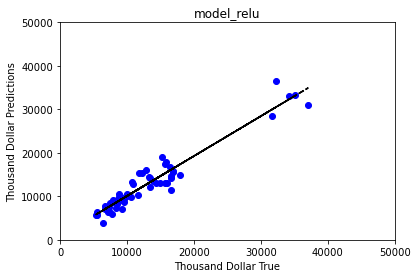

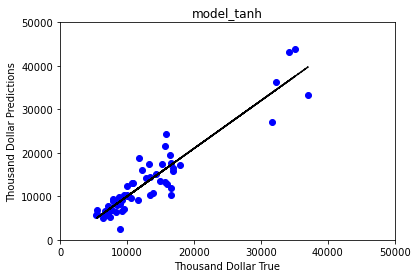

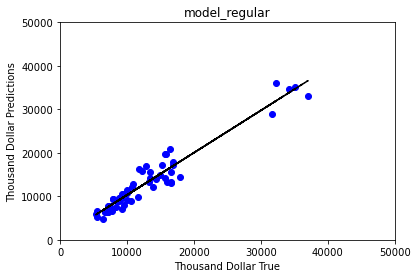

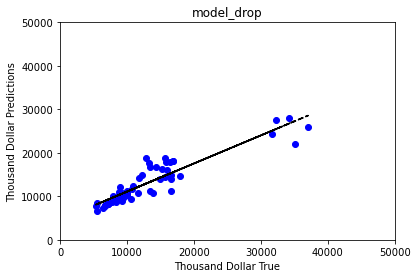

In [65]:
plot_list = []
for i,j in enumerate([model_relu, model_tanh, model_regular, model_drop]):
  list_name = ['model_relu', 'model_tanh', 'model_regular', 'model_drop']
  plot_list.append(plotting(j,list_name[i]))